* Un proyecto personal de Covid-19 en la provincia de Córdoba, Argentina.
* Los datos fueron descargados de la pagina: https://datos.gob.ar/

### Leemos los datos y nos quedamos solamente con los datos de Córdoba

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df = pd.read_csv('Covid19Casos.csv')

In [3]:
df.head()

,id_evento_caso,sexo,edad,edad_años_meses,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,...,fecha_fallecimiento,asistencia_respiratoria_mecanica,carga_provincia_id,origen_financiamiento,clasificacion,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico,residencia_departamento_id,ultima_actualizacion
0,1000000,M,54.0,Años,Argentina,CABA,SIN ESPECIFICAR,Buenos Aires,NaN,2020-06-01,...,NaN,NO,6,Privado,Caso Descartado,Descartado,2,2020-06-09,0,2021-02-15
1,1000002,M,22.0,Años,Argentina,Buenos Aires,La Matanza,Buenos Aires,NaN,2020-06-01,...,NaN,NO,6,Público,Caso Descartado,Descartado,6,2020-06-01,427,2021-02-15
2,1000003,F,41.0,Años,Argentina,Córdoba,Capital,Córdoba,2020-05-24,2020-06-01,...,NaN,NO,14,Privado,Caso Descartado,Descartado,14,2020-06-01,14,2021-02-15
3,1000005,F,58.0,Años,Argentina,Mendoza,Las Heras,Mendoza,NaN,2020-06-01,...,NaN,NO,50,Público,Caso Descartado,Descartado,50,2020-06-01,49,2021-02-15
4,1000006,M,29.0,Años,Argentina,Buenos Aires,Malvinas Argentinas,Buenos Aires,2020-05-30,2020-06-01,...,NaN,NO,6,Público,Caso sospechoso - No Activo - Con muestra sin ...,Sospechoso,6,NaN,515,2021-02-15


In [39]:
df.isnull().sum()

sexo                                     0
edad                                    56
edad_años_meses                          0
residencia_provincia_nombre              0
residencia_departamento_nombre           0
fecha_inicio_sintomas               563113
sepi_apertura                            0
fecha_internacion                   696975
cuidado_intensivo                        0
fecha_cui_intensivo                 702968
fallecido                                0
fecha_fallecimiento                 703106
asistencia_respiratoria_mecanica         0
origen_financiamiento                    0
clasificacion                            0
clasificacion_resumen                    0
fecha_diagnostico                    40095
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6345193 entries, 0 to 6345192
Data columns (total 25 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   id_evento_caso                    int64  
 1   sexo                              object 
 2   edad                              float64
 3   edad_años_meses                   object 
 4   residencia_pais_nombre            object 
 5   residencia_provincia_nombre       object 
 6   residencia_departamento_nombre    object 
 7   carga_provincia_nombre            object 
 8   fecha_inicio_sintomas             object 
 9   fecha_apertura                    object 
 10  sepi_apertura                     int64  
 11  fecha_internacion                 object 
 12  cuidado_intensivo                 object 
 13  fecha_cui_intensivo               object 
 14  fallecido                         object 
 15  fecha_fallecimiento               object 
 16  asistencia_respiratoria_mecanica  ob

In [5]:
df.describe()

,id_evento_caso,edad,sepi_apertura,carga_provincia_id,residencia_provincia_id,residencia_departamento_id
count,6.345193e+06,6.341490e+06,6.345193e+06,6.345193e+06,6.345193e+06,6.345193e+06
mean,4.316059e+06,3.944718e+01,3.037850e+01,2.393787e+01,2.504654e+01,1.950822e+02
std,1.976355e+06,1.848592e+01,1.814925e+01,2.984928e+01,2.998729e+01,2.491082e+02
min,6.720640e+05,0.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00
25%,2.624540e+06,2.700000e+01,6.000000e+00,2.000000e+00,6.000000e+00,1.400000e+01
50%,4.320892e+06,3.700000e+01,3.700000e+01,6.000000e+00,6.000000e+00,6.300000e+01
75%,6.027530e+06,5.100000e+01,4.500000e+01,3.800000e+01,4.200000e+01,3.710000e+02
max,7.714118e+06,1.944000e+03,5.300000e+01,9.400000e+01,9.900000e+01,8.820000e+02


In [6]:
df.shape

(6345193, 25)

#### Nos quedamos con Córdoba

In [8]:
df = df.loc[df.loc[:, 'residencia_provincia_nombre'] == 'Córdoba']

In [9]:
df.loc[df['residencia_provincia_nombre'] == 'Córdoba']

,id_evento_caso,sexo,edad,edad_años_meses,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,...,fecha_fallecimiento,asistencia_respiratoria_mecanica,carga_provincia_id,origen_financiamiento,clasificacion,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico,residencia_departamento_id,ultima_actualizacion
2,1000003,F,41.0,Años,Argentina,Córdoba,Capital,Córdoba,2020-05-24,2020-06-01,...,NaN,NO,14,Privado,Caso Descartado,Descartado,14,2020-06-01,14,2021-02-15
31,1000040,F,52.0,Años,Argentina,Córdoba,Capital,Córdoba,2020-05-21,2020-06-01,...,NaN,NO,14,Privado,Caso Descartado,Descartado,14,2020-05-28,14,2021-02-15
43,1000057,NR,NaN,Años,Argentina,Córdoba,San Justo,Córdoba,NaN,2020-06-01,...,NaN,NO,14,Público,Caso Descartado,Descartado,14,2020-06-01,140,2021-02-15
54,1000075,F,51.0,Años,Argentina,Córdoba,Capital,Córdoba,2020-05-27,2020-06-01,...,NaN,NO,14,Privado,Caso Descartado,Descartado,14,2020-05-29,14,2021-02-15
165,1000240,F,1.0,Años,Argentina,Córdoba,Capital,Córdoba,2020-05-29,2020-06-01,...,NaN,NO,14,Público,Caso Descartado,Descartado,14,2020-06-01,14,2021-02-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6345106,999892,F,35.0,Años,Argentina,Córdoba,Santa María,Córdoba,2020-05-28,2020-06-01,...,NaN,NO,14,Privado,Caso Descartado,Descartado,14,2020-05-28,147,2021-02-15
6345143,999939,M,41.0,Años,SIN ESPECIFICAR,Córdoba,Río Cuarto,Buenos Aires,NaN,2020-06-01,...,NaN,NO,6,Privado,Caso Descartado,Descartado,14,2020-06-01,98,2021-02-15
6345150,999946,M,45.0,Años,Argentina,Córdoba,San Justo,Córdoba,NaN,2020-06-01,...,NaN,NO,14,Público,Caso Descartado,Descartado,14,2020-06-01,140,2021-02-15
6345154,999950,F,32.0,Años,Argentina,Córdoba,Río Cuarto,Buenos Aires,NaN,2020-06-01,...,NaN,NO,6,Privado,Caso Descartado,Descartado,14,2020-06-01,98,2021-02-15


In [10]:
df['residencia_provincia_nombre'].unique()

array(['Córdoba'], dtype=object)

In [11]:
df.shape

(706309, 25)

In [12]:
df.columns.values

array(['id_evento_caso', 'sexo', 'edad', 'edad_años_meses',
       'residencia_pais_nombre', 'residencia_provincia_nombre',
       'residencia_departamento_nombre', 'carga_provincia_nombre',
       'fecha_inicio_sintomas', 'fecha_apertura', 'sepi_apertura',
       'fecha_internacion', 'cuidado_intensivo', 'fecha_cui_intensivo',
       'fallecido', 'fecha_fallecimiento',
       'asistencia_respiratoria_mecanica', 'carga_provincia_id',
       'origen_financiamiento', 'clasificacion', 'clasificacion_resumen',
       'residencia_provincia_id', 'fecha_diagnostico',
       'residencia_departamento_id', 'ultima_actualizacion'], dtype=object)

# Limpieza de datos

* Eliminamos columnas innecesarias
* Reemplazamos los valores de tipo str por enteros

In [13]:
df.drop(['residencia_pais_nombre','ultima_actualizacion','carga_provincia_id',
         'id_evento_caso','fecha_apertura','residencia_departamento_id',
         'carga_provincia_nombre','residencia_provincia_id'], axis=1, inplace=True)

In [14]:
df['clasificacion_resumen'].unique()

array(['Descartado', 'Sospechoso', 'Confirmado', 'Sin Clasificar'],
      dtype=object)

In [15]:
#Reemplazamos los valores de la  columna sexo (F o M) a variables enteras
df['sexo'].replace(['F','M','NR'], [0,1,2], inplace=True)

In [17]:
#Reemplazamos los valores de la  columna cuidado_instensivo (SI o NO) a variables enteras
df['cuidado_intensivo'].replace(['NO','SI'], [0,1], inplace=True)

In [18]:
#Reemplazamos los valores de la  columna asistencia_respiratoria_mecanica (SI o NO) a variables enteras
df['asistencia_respiratoria_mecanica'].replace(['NO','SI'], [0,1], inplace=True)

In [19]:
#Reemplazamos los valores de la  columna fallecido (Si o No) a variables enteras
df['fallecido'].replace(['SI','NO'], [1,0], inplace=True)

In [20]:
#Reemplazamos los valores de la  columna clasificacion_resumen (casos confirmados, descartados, Sospechoso, Sin Clasificar) a variables enteras
df['clasificacion_resumen'].replace(['Descartado', 'Sospechoso', 'Sin Clasificar', 'Confirmado'],
                                    [1,2,3,4], inplace=True)

In [36]:
#Nos quedamos con las filas que tienen covid
casos_conf = df[df['clasificacion_resumen'] == 4]
casos_conf['clasificacion_resumen'].sum()

608584

In [35]:
#Nos quedamos con las filas de pacientes fallecidos
casos_fall = df[df['fallecido'] == 1]
casos_fall['fallecido'].sum()

3203

## Conclusiones y graficos

In [24]:
print (f"Casos descartados: {(df['clasificacion_resumen'] == 1).sum()}")
print (f"Casos sospechosos: {(df['clasificacion_resumen'] == 2).sum()}")
print (f"Casos sin calificar: {(df['clasificacion_resumen'] == 3).sum()}")
print (f"Casos confirmados: {(df['clasificacion_resumen'] == 4).sum()}")

Casos descartados: 504913
Casos sospechosos: 49239
Casos sin calificar: 11
Casos confirmados: 152146


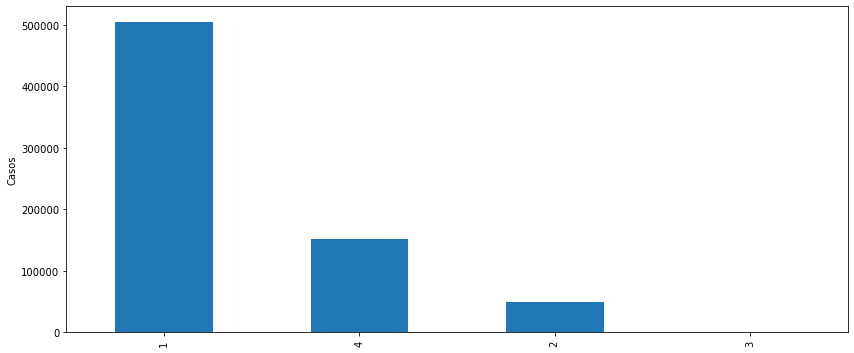

In [99]:
ax = df['clasificacion_resumen'].value_counts().plot(kind='bar', figsize=(14,6))
ax.set_ylabel('Casos')
plt.show()

In [26]:
print (f"Fallecidos {(df['fallecido']==1).sum()}")

Fallecidos 3203


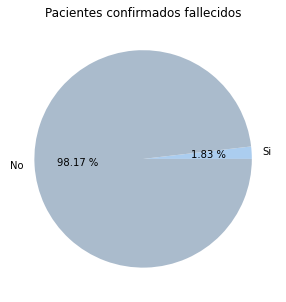

In [96]:
si = casos_conf.loc[casos_conf['fallecido'] == 1].count()[0]
no = casos_conf.loc[casos_conf['fallecido'] == 0].count()[0]

plt.figure(figsize=(8,5))

labels = ['Si', 'No']
colors = ['#abcdef', '#aabbcc']

plt.pie([si, no], labels = labels, colors=colors, autopct='%.2f %%')

plt.title('Pacientes confirmados fallecidos')

plt.show()

In [27]:
print (f"Mujeres confirmadas: {(casos_conf['sexo'] == 0).sum()}")
print (f"Hombres confirmados: {(casos_conf['sexo'] == 1).sum()}")

Mujeres confirmadas: 77593
Hombres confirmados: 73861


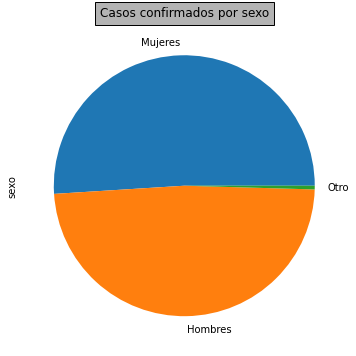

In [28]:
casos_conf['sexo'].value_counts().plot(kind='pie', figsize=(6,6), labels=['Mujeres','Hombres', 'Otro'])
plt.title('Casos confirmados por sexo', bbox={'facecolor':'0.7', 'pad':5})
plt.show()

In [29]:
#El 61% de los contagiados esta entre los 20 y 50
print (f"Personas menores a 10 (inclusive) contagidas: {(casos_conf['edad'] <= 10).sum()}")
print (f"Personas mayores a 10 y menores de 20 (inclusive) contagidas: {((casos_conf['edad'] > 10) & (casos_conf['edad'] <= 20)).sum()}")
print (f"Personas mayores a 20 y menores de 30 (inclusive) contagidas: {((casos_conf['edad'] > 20) & (casos_conf['edad'] <= 30)).sum()}")
print (f"Personas mayores a 30 y menores de 40 (inclusive) contagidas: {((casos_conf['edad'] > 30) & (casos_conf['edad'] <= 40)).sum()}")
print (f"Personas mayores a 40 y menores de 50 (inclusive) contagidas: {((casos_conf['edad'] > 40) & (casos_conf['edad'] <= 50)).sum()}")
print (f"Personas mayores a 50 y menores de 60 (inclusive) contagidas: {((casos_conf['edad'] > 50) & (casos_conf['edad'] <= 60)).sum()}")
print (f"Personas mayores a 60 y menores de 70 (inclusive) contagidas: {((casos_conf['edad'] > 60) & (casos_conf['edad'] <= 70)).sum()}")
print (f"Personas mayores a 70 y menores de 80 (inclusive) contagidas: {((casos_conf['edad'] > 70) & (casos_conf['edad'] <= 80)).sum()}")
print (f"Personas mayores a 80 y menores de 90 (inclusive) contagidas: {((casos_conf['edad'] > 80) & (casos_conf['edad'] <= 90)).sum()}")
print (f"Personas mayores a 90 contagiados: {((casos_conf['edad'] > 90)).sum()}")

Personas menores a 10 (inclusive) contagidas: 3892
Personas mayores a 10 y menores de 20 (inclusive) contagidas: 13524
Personas mayores a 20 y menores de 30 (inclusive) contagidas: 32965
Personas mayores a 30 y menores de 40 (inclusive) contagidas: 31686
Personas mayores a 40 y menores de 50 (inclusive) contagidas: 26537
Personas mayores a 50 y menores de 60 (inclusive) contagidas: 19241
Personas mayores a 60 y menores de 70 (inclusive) contagidas: 12650
Personas mayores a 70 y menores de 80 (inclusive) contagidas: 7346
Personas mayores a 80 y menores de 90 (inclusive) contagidas: 3521
Personas mayores a 90 contagiados: 769


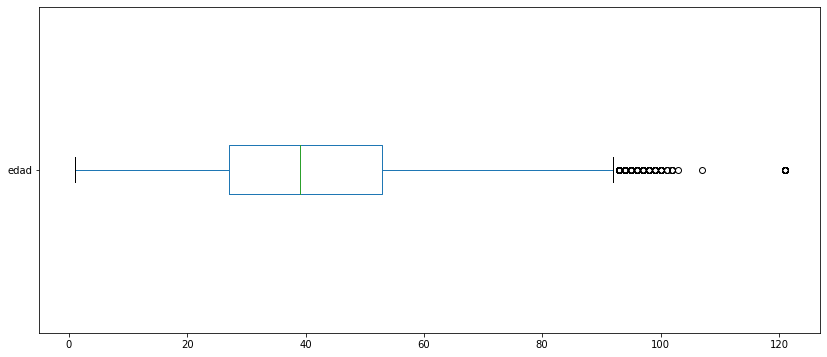

In [30]:
casos_conf['edad'].plot(kind='box', vert=False, figsize=(14,6));

In [31]:
#Casos por departamento
departamento = casos_conf['residencia_departamento_nombre'].unique()
for i in departamento:
    print (f"Cantidad de casos en {i}: {(casos_conf['residencia_departamento_nombre'] == i).sum()}")

Cantidad de casos en Capital: 67856
Cantidad de casos en Río Cuarto: 14419
Cantidad de casos en General San Martín: 7033
Cantidad de casos en Unión: 3902
Cantidad de casos en Marcos Juárez: 6257
Cantidad de casos en Río Primero: 1939
Cantidad de casos en Calamuchita: 1687
Cantidad de casos en Punilla: 5072
Cantidad de casos en Colón: 8790
Cantidad de casos en San Justo: 10810
Cantidad de casos en Santa María: 3991
Cantidad de casos en San Javier: 1186
Cantidad de casos en San Alberto: 638
Cantidad de casos en Tercero Arriba: 6192
Cantidad de casos en Río Segundo: 4426
Cantidad de casos en General Roca: 1134
Cantidad de casos en Juárez Celman: 2364
Cantidad de casos en Cruz del Eje: 820
Cantidad de casos en Totoral: 479
Cantidad de casos en Presidente Roque Sáenz Peña: 1331
Cantidad de casos en SIN ESPECIFICAR: 620
Cantidad de casos en Río Seco: 131
Cantidad de casos en Minas: 70
Cantidad de casos en Tulumba: 162
Cantidad de casos en Ischilín: 720
Cantidad de casos en Sobremonte: 61
Can

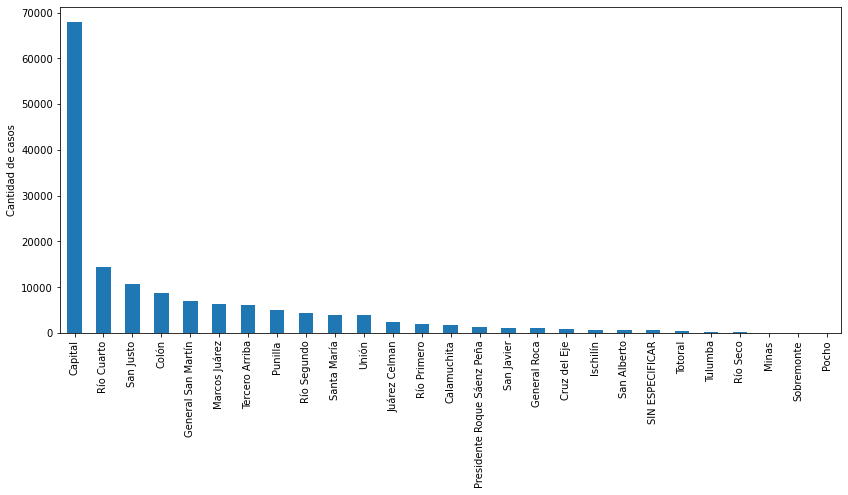

In [43]:
ax = casos_conf['residencia_departamento_nombre'].value_counts().plot(kind='bar', figsize=(14,6))
ax.set_ylabel('Cantidad de casos')
plt.show()

In [53]:
cant_fall = casos_fall["fallecido"].sum()
cant_fall_homb = (casos_fall['sexo'] == 1).sum()
cant_fall_muj = (casos_fall['sexo'] == 0).sum()

print (f"Mujeres fallecidas: {cant_fall_muj}")
print (f"Hombres fallecidos: {cant_fall_homb}")

porc_homb_fall = (cant_fall_homb / cant_fall)*100
porc_muj_fall = (cant_fall_muj / cant_fall)*100
print (f"Porcentaje hombres fallecidos: {round(porc_homb_fall,2)}%")
print (f"Porcentaje mujeres fallecidos: {round(porc_muj_fall,2)}%")

Mujeres fallecidas: 1258
Hombres fallecidos: 1867
Porcentaje hombres fallecidos: 58.29%
Porcentaje mujeres fallecidos: 39.28%


In [45]:
#Promedio de edad de fallecidos 73.4
prom_edad_fallecidos = casos_fall['edad'].mean()
round(prom_edad_fallecidos, 2)

73.28

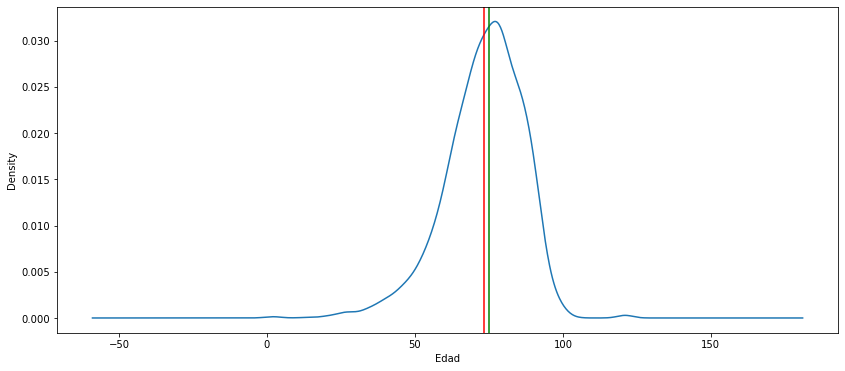

In [68]:
ax = casos_fall['edad'].plot(kind='density', figsize=(14,6)) # kde
ax.axvline(casos_fall['edad'].mean(), color='red')
ax.axvline(casos_fall['edad'].median(), color='green')
plt.xlabel('Edad');

In [47]:
#El promedio de edad de personas que no necesitaron respiracion asistida fue de 41, y el promedio de personas
#que si necesitaron respiracion asistida fue de 68
casos_conf[["asistencia_respiratoria_mecanica", "edad"]].groupby("asistencia_respiratoria_mecanica").mean()

,edad
asistencia_respiratoria_mecanica,
0,40.870619
1,66.545267


In [48]:
casos_conf_ar = (casos_conf["asistencia_respiratoria_mecanica"] == 1).sum()
casos_confirmados = (df['clasificacion_resumen'] == 4).sum()
porcentaje_resp_asist = casos_conf_ar/casos_confirmados*100
print (f"De los casos confirmados un {round(porcentaje_resp_asist,2)}% necesitó respiracion asistida")

De los casos confirmados un 0.32% necesitó respiracion asistida


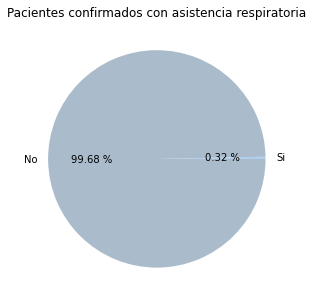

In [98]:
si = casos_conf.loc[casos_conf['asistencia_respiratoria_mecanica'] == 1].count()[0]
no = casos_conf.loc[casos_conf['asistencia_respiratoria_mecanica'] == 0].count()[0]

plt.figure(figsize=(8,5))

labels = ['Si', 'No']
colors = ['#abcdef', '#aabbcc']

plt.pie([si, no], labels = labels, colors=colors, autopct='%.2f %%')

plt.title('Pacientes confirmados con asistencia respiratoria')

plt.show()

In [49]:
#El promedio de edad de confirmados con cuidado intensivo  es de 70 y el promedio de de edad que no recibieron cuidado intensivo es de 40 
casos_conf[["cuidado_intensivo", "edad"]].groupby("cuidado_intensivo").mean()

,edad
cuidado_intensivo,
0,40.685743
1,68.591753
